<a href="https://colab.research.google.com/github/noviads/Machine-Learning-for-Official-Statistics-and-the-SDGs-23-UNSIAP-/blob/main/Copy_of_Sharing_Knowlege2_at_BPS_RI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Sharing Knowlege 2* - at BPS RI (DIREKTORAT STATISTIK KETAHANAN SOSIAL)**
## **Mengenal Bahasa Pemrograman Python (PRAKTIK)**
by: Alfonsius Lintang & Callista Angelira

# **1. Import dan Tampilkan Data**



**1.1 Import File Data ke Google Colab**

Akses Data: https://drive.google.com/drive/folders/1uJG_JAAB1JbwZwn25qLPDOpHkwzJeyCY?usp=sharing

In [ ]:
from google.colab import files
upload = files.upload()

Saving Data Contoh Kelompok Masyarakat Usia Produktif.csv to Data Contoh Kelompok Masyarakat Usia Produktif.csv


**1.2 Menampilkan Beberapa Baris Pertama dari Dataset**
*   Ini bertujuan untuk mendapatkan gambaran awal tentang data yang kita miliki.




In [ ]:
import pandas as pd
df = pd.read_csv('Data Contoh Kelompok Masyarakat Usia Produktif.csv', sep = ',')
df

,nik,domisili,gender,usia,tingkat_pendidikan,pekerjaan,pengeluaran
0,111111148,DKI Jakarta,L,47,S2,wiraswasta,Rp10.950.000
1,111111138,DKI Jakarta,L,30,NaN,pekerja kontrak,Rp320.000
2,111111186,DKI Jakarta,L,240,SMA,pekerja lepas,Rp520.000
3,111111195,DKI Jakarta,P,30,SMA,pekerja lepas,Rp480.000
4,111111189,DKI Jakarta,L,24,S2,pegawai swasta,Rp8.450.000
...,...,...,...,...,...,...,...
95,111111192,Bali,P,60,SD,pekerja lepas,Rp2.300.000
96,111111137,Bali,P,45,S1,pegawai swasta,Rp4.650.000
97,111111110,Bali,L,99,S2,wiraswasta,Rp5.600.000
98,111111150,Bali,P,47,S2,wiraswasta,Rp7.500.000


**1.3 Memeriksa Tipe Data**
*  Menggunakan metode .dtypes untuk melihat tipe data dari setiap kolom dalam
dataset. Hal ini penting untuk mengetahui apakah tipe data sudah sesuai sebelum melanjutkan ke langkah-langkah pembersihan data lainnya.



In [ ]:
print("Tipe Data Untuk Setiap Kolom:")
df.dtypes

Tipe Data Untuk Setiap Kolom:


,0
nik,int64
domisili,object
gender,object
usia,int64
tingkat_pendidikan,object
pekerjaan,object
pengeluaran,object


**1.4 Mengubah Tipe Data yang Tidak Sesuai**
* Menghapus penyebab data dikategorikan sebagai 'string'.



In [ ]:
df['pengeluaran'] = df['pengeluaran'].str.replace('Rp', '', regex=False)
df['pengeluaran'] = df['pengeluaran'].str.replace('.', '', regex=False)


*   Mengubah tipe data pada kolom 'pengeluaran' dari 'object' menjadi 'integer' agar bisa dilakukan operasi perhitungan dan visualisasi.



In [ ]:
df['pengeluaran'] = df['pengeluaran'].fillna(0).astype(int)
df['pengeluaran'] = df['pengeluaran'].astype(int)

* Memeriksa kembali tipe data yang telah diubah apakah sudah sesuai.

In [ ]:
print("Tipe Data Untuk Setiap Kolom Setelah Dilakukan Perubahan:")
df.dtypes

Tipe Data Untuk Setiap Kolom Setelah Dilakukan Perubahan:


,0
nik,int64
domisili,object
gender,object
usia,int64
tingkat_pendidikan,object
pekerjaan,object
pengeluaran,int64


# **2. Pembersihan Data (Data Cleansing)**

**2.1 Input Packages yang Dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.2 Cek Nilai Null dan Menggantinya Dengan Nilai Modus**
*   Memeriksa jumlah nilai yang hilang (null) di setiap kolom.



In [ ]:
print("Jumlah nilai null di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai null di setiap kolom:
nik                   0
domisili              0
gender                2
usia                  0
tingkat_pendidikan    2
pekerjaan             0
pengeluaran           0
dtype: int64



*   Mengganti nilai yang hilang dengan nilai modus (nilai yang paling sering muncul) dari kolom tersebut.

In [ ]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)



*   Cek Kembali Apakah Masih Ada Nilai yang Hilang (Null)



In [ ]:
print("Jumlah nilai null setelah diganti dengan modus:")
print(df.isnull().sum())

Jumlah nilai null setelah diganti dengan modus:
nik                   0
domisili              0
gender                0
usia                  0
tingkat_pendidikan    0
pekerjaan             0
pengeluaran           0
dtype: int64


**2.3 Cek Data Duplikat dan Menghapusnya**
*   Memeriksa Jumlah Baris yang Duplikat Dalam Data


In [ ]:
print("Jumlah data duplikat:")
print(df.duplicated().sum())

Jumlah data duplikat:
1




*   Menampilkan Data yang Duplikat



In [ ]:
duplicated_rows = df[df.duplicated()]
print("Data yang duplikat:")
display(duplicated_rows)

Data yang duplikat:


,nik,domisili,gender,usia,tingkat_pendidikan,pekerjaan,pengeluaran
45,111111115,Jawa Tengah,L,37,SD,pekerja lepas,870000




*   Menghapus Baris yang Duplikat Untuk Memastikan Keunikan Data



In [ ]:
df.drop_duplicates(inplace=True)



*   Cek Kembali Apakah Masih Ada Data yang Duplikat



In [ ]:
print("Jumlah data duplikat setelah dihapus:")
print(df.duplicated().sum())

Jumlah data duplikat setelah dihapus:
0


# **3. Exploratory Data Analysis (EDA)**

**3.1 Deskripsi Statistik**
*   Menyediakan ringkasan statistik dari kolom numerik, termasuk mean, median, dan lain-lain.


In [ ]:
print("Deskripsi Statistik Dari Data:")
display(df.describe())

Deskripsi Statistik Dari Data:


,nik,usia,pengeluaran
count,9.900000e+01,99.000000,9.900000e+01
mean,1.111112e+08,45.141414,3.848283e+06
std,2.894801e+01,24.220926,3.509707e+06
min,1.111111e+08,13.000000,0.000000e+00
25%,1.111111e+08,31.000000,8.700000e+05
50%,1.111112e+08,45.000000,3.250000e+06
75%,1.111112e+08,54.000000,6.070000e+06
max,1.111112e+08,240.000000,1.950000e+07


**3.2 Distribusi Data Numerik**
*   Menampilkan histogram dengan kernel density estimate (KDE) untuk setiap kolom numerik untuk memahami distribusi data.


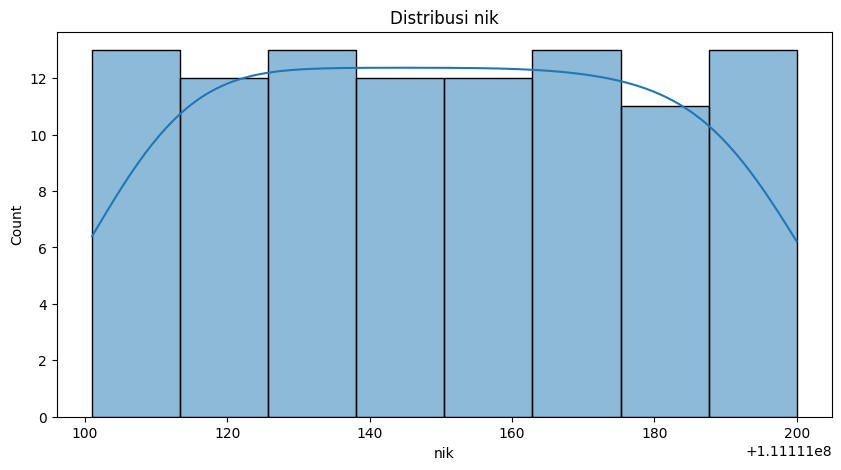

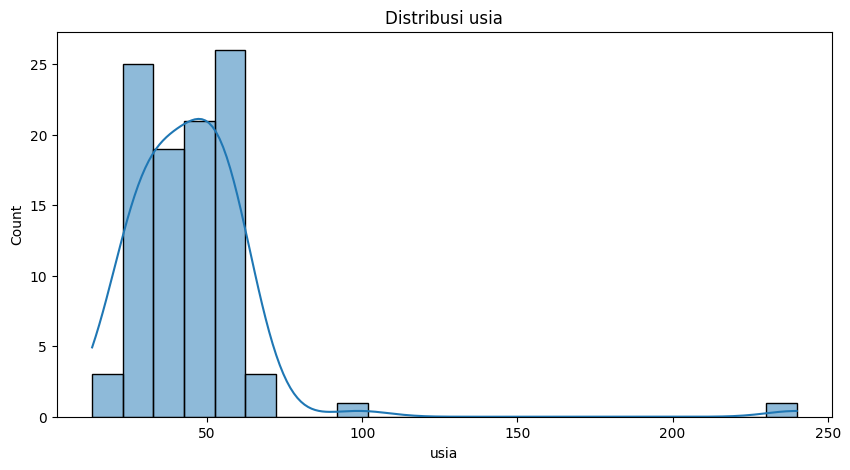

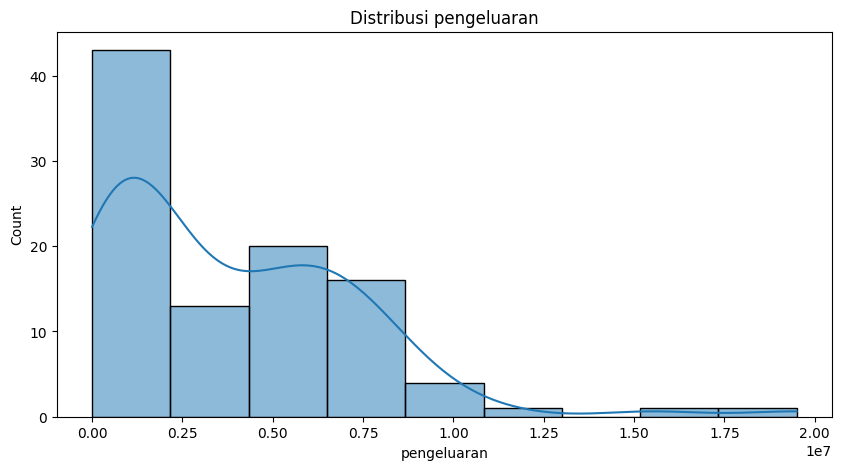

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

**3.3 Distribusi Data Kategorikal**
*   Menampilkan count plot untuk setiap kolom kategorikal untuk memahami distribusi kategori.



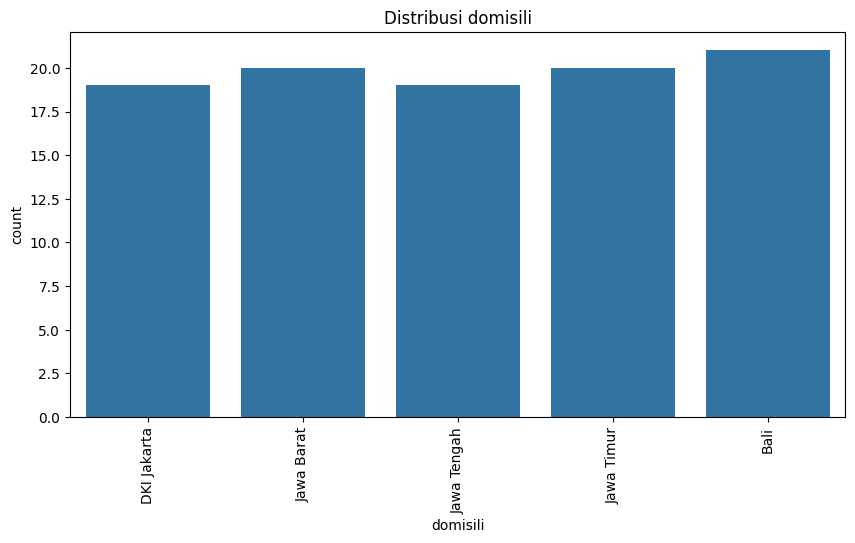

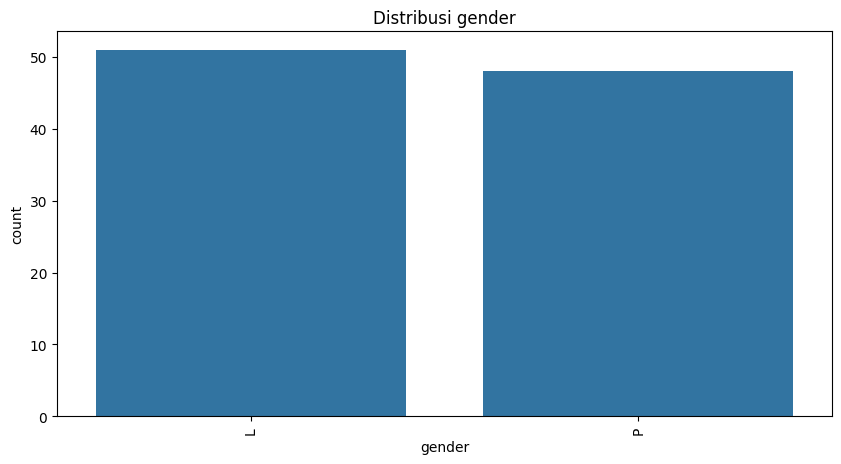

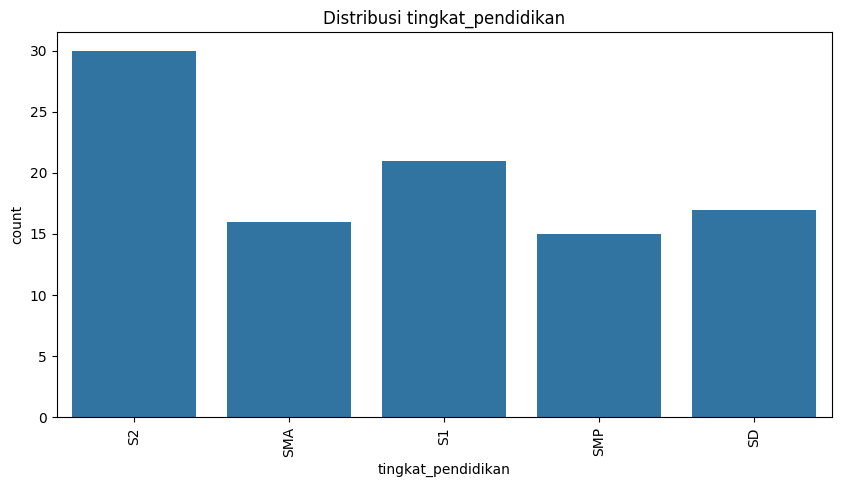

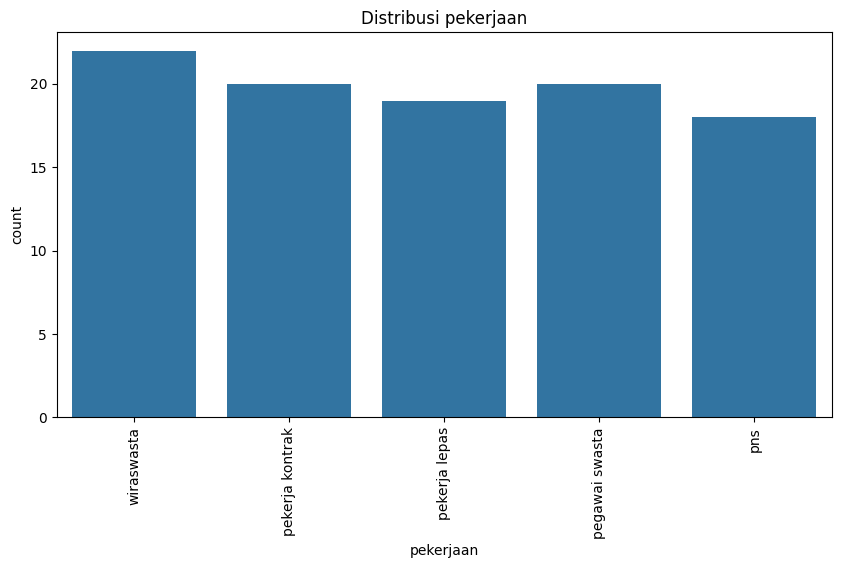

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=90)
    plt.show()

**3.4 Mengidentifikasi Outlier Usia**
* Membuat batasan agar suatu data dapat dikatakan outlier.

In [ ]:
outlier_mask = (df['usia'] < 15) | (df['usia'] > 65)
outliers = df[outlier_mask]

* Visualisasi Distribusi Outlier Usia

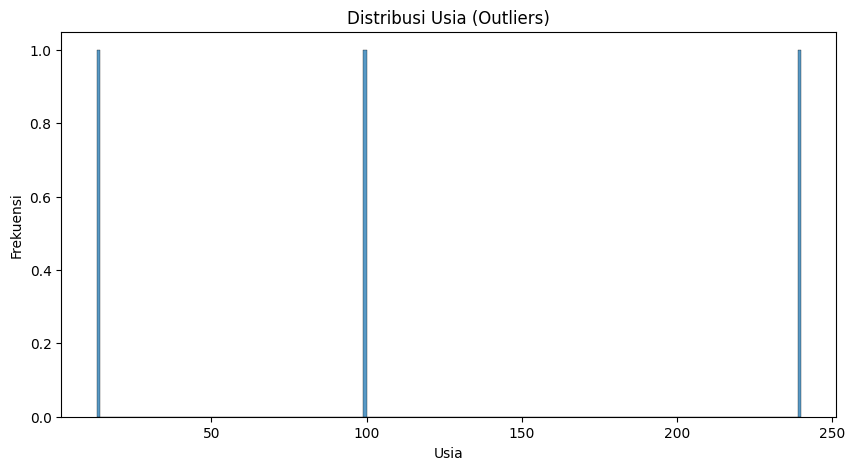

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(outliers['usia'], bins=range(int(df['usia'].min()), int(df['usia'].max()) + 1), kde=False)
plt.title('Distribusi Usia (Outliers)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

**3.5 Penanganan Outlier Usia**
*   Menghitung nilai rata-rata (mean) usia tanpa outlier.



In [ ]:
mean_age = df.loc[~outlier_mask, 'usia'].mean()

* Mengonversi tipe data rata-rata usia ke tipe data integer

In [ ]:
mean_age = int(mean_age)

* Mengganti nilai outlier dengan nilai rata-rata (mean) usia

In [ ]:
df.loc[outlier_mask, 'usia'] = mean_age

* Menampilkan Hasil Untuk Verifikasi

In [ ]:
print("Rata-rata usia (setelah konversi ke integer):", mean_age)
print("Data setelah penggantian outlier:")
print(df['usia'].describe())

Rata-rata usia (setelah konversi ke integer): 42
Data setelah penggantian outlier:
count    99.000000
mean     42.858586
std      12.413793
min      21.000000
25%      32.000000
50%      43.000000
75%      54.000000
max      65.000000
Name: usia, dtype: float64


In [ ]:
df

,nik,domisili,gender,usia,tingkat_pendidikan,pekerjaan,pengeluaran
0,111111148,DKI Jakarta,L,47,S2,wiraswasta,10950000
1,111111138,DKI Jakarta,L,30,S2,pekerja kontrak,320000
2,111111186,DKI Jakarta,L,42,SMA,pekerja lepas,520000
3,111111195,DKI Jakarta,P,30,SMA,pekerja lepas,480000
4,111111189,DKI Jakarta,L,24,S2,pegawai swasta,8450000
...,...,...,...,...,...,...,...
95,111111192,Bali,P,60,SD,pekerja lepas,2300000
96,111111137,Bali,P,45,S1,pegawai swasta,4650000
97,111111110,Bali,L,42,S2,wiraswasta,5600000
98,111111150,Bali,P,47,S2,wiraswasta,7500000


# **4. Visualisasi Data**

**Color Palet seaborn:**
deep, muted, pastel, dark, colorblind, husl, cubehelix

**Color Palet matplotlib:**
viridis, plasma, inferno, magma, cividis, tab10, Set1, Pastel1

**4.1 Countplot**

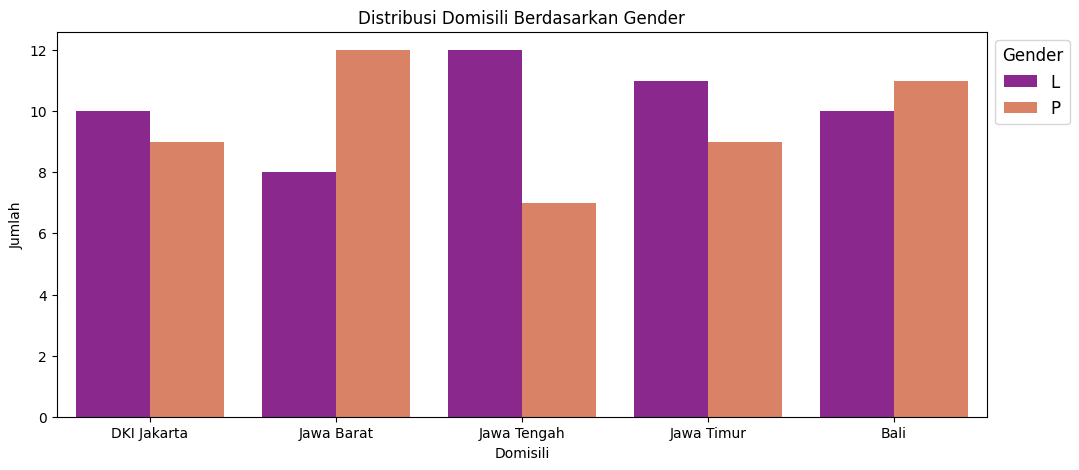

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='domisili', hue='gender', palette='plasma')

plt.title('Distribusi Domisili Berdasarkan Gender')
plt.xlabel('Domisili')
plt.ylabel('Jumlah')
plt.legend(title='Gender', title_fontsize='12', fontsize='12', bbox_to_anchor=(1, 1))
plt.show()

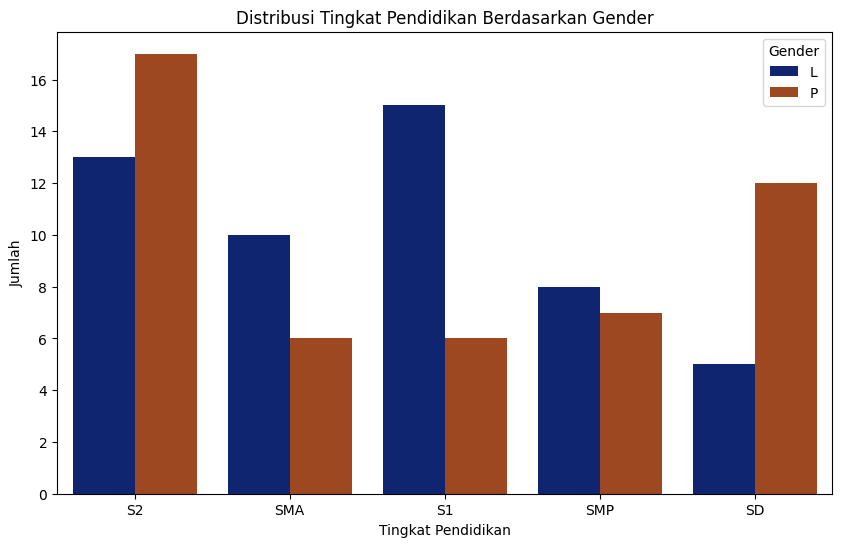

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tingkat_pendidikan', hue='gender', palette='dark')

plt.title('Distribusi Tingkat Pendidikan Berdasarkan Gender')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.legend(title='Gender')
plt.show()

**4.2 Scaterplot**

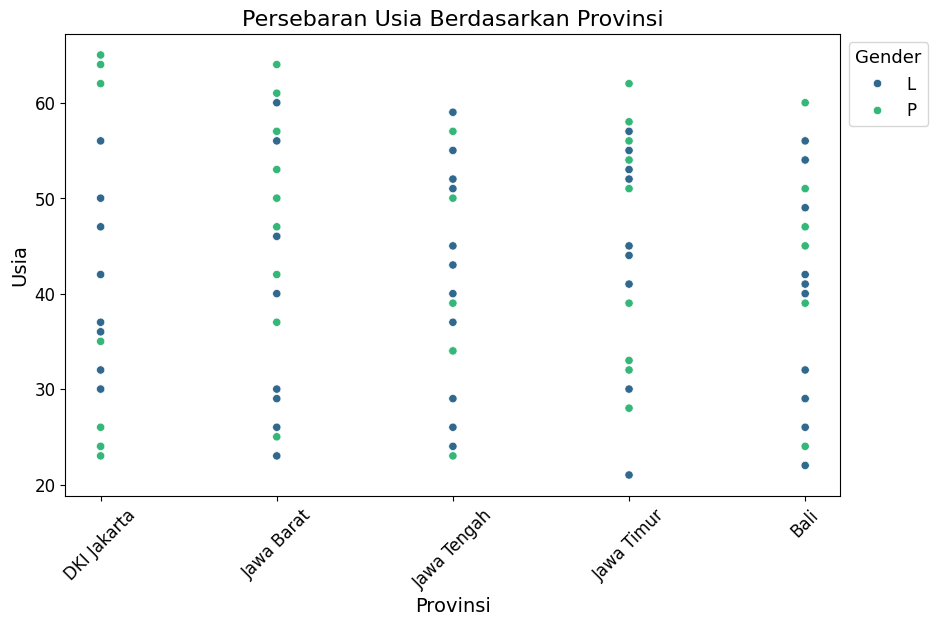

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='domisili', y='usia', hue='gender', palette='viridis')

plt.title('Persebaran Usia Berdasarkan Provinsi', fontsize=16)
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Usia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', title_fontsize='13', fontsize='12', bbox_to_anchor=(1, 1))
plt.show()

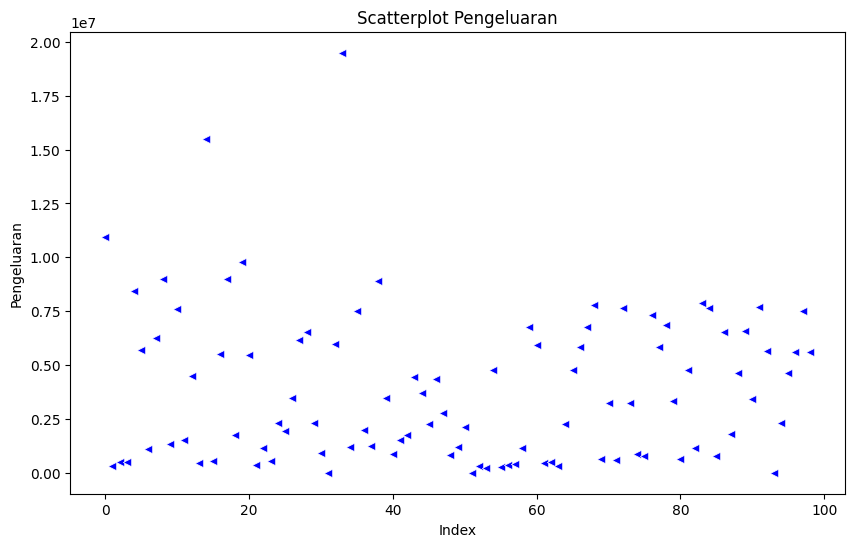

In [ ]:
df['index'] = range(len(df))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='index', y='pengeluaran', data=df, color='blue', marker='<')

plt.title('Scatterplot Pengeluaran')
plt.xlabel('Index')
plt.ylabel('Pengeluaran')
plt.show()

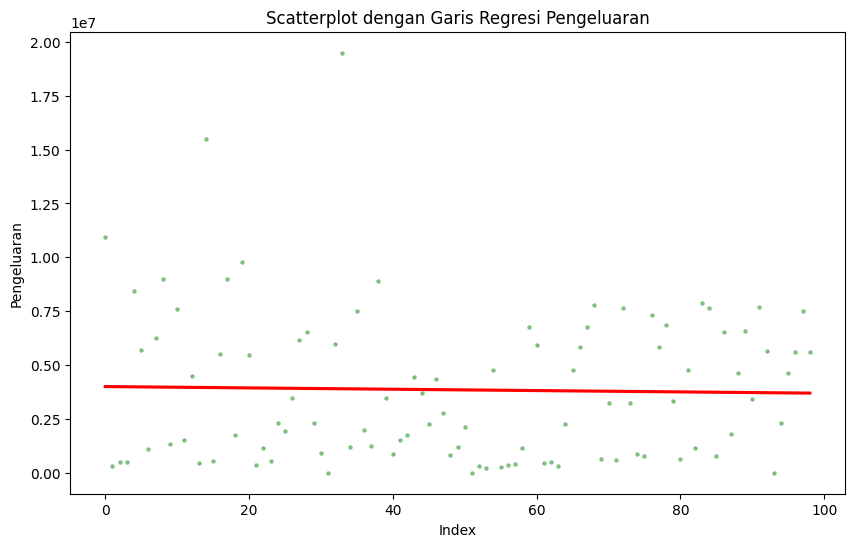

In [ ]:
df['index'] = range(len(df))

plt.figure(figsize=(10, 6))

# Membuat scatterplot dengan garis regresi berdasarkan gender
sns.regplot(x='index', y='pengeluaran', data=df,
            scatter_kws={'s':10, 'color':'green', 'alpha':0.5, 'edgecolor':'black', 'linewidth':0},
            line_kws={'color':'red'},
            ci=None)

# Menambahkan judul dan label
plt.title('Scatterplot dengan Garis Regresi Pengeluaran')
plt.xlabel('Index')
plt.ylabel('Pengeluaran')

# Menampilkan plot
plt.show()

**4.3 Heatmap**

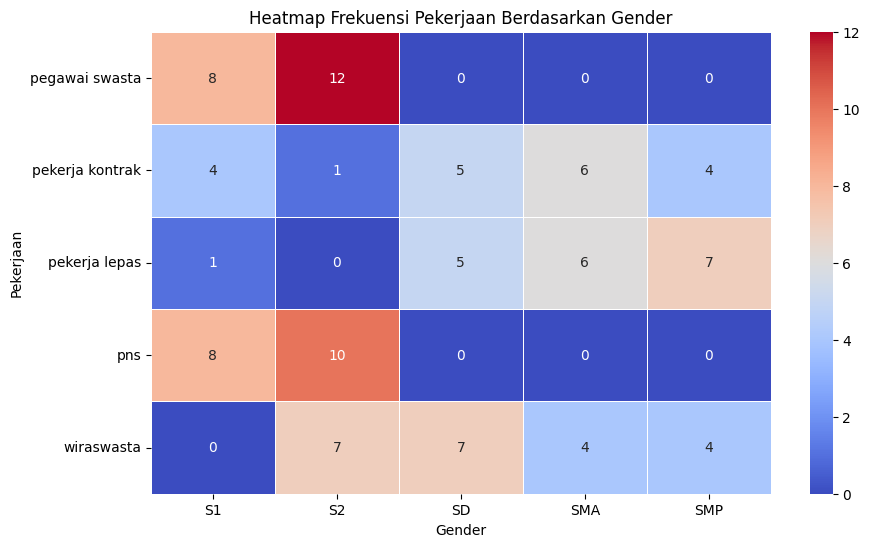

In [ ]:
# Menghitung frekuensi kombinasi antara pekerjaan dan tingkat_pendidikan
data_crosstab = pd.crosstab(df['pekerjaan'], df['tingkat_pendidikan'])

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat heatmap
sns.heatmap(data_crosstab, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)

# Menambahkan judul dan label
plt.title('Heatmap Frekuensi Pekerjaan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Pekerjaan')

# Menampilkan plot
plt.show()

**4.4 Violin Plot**

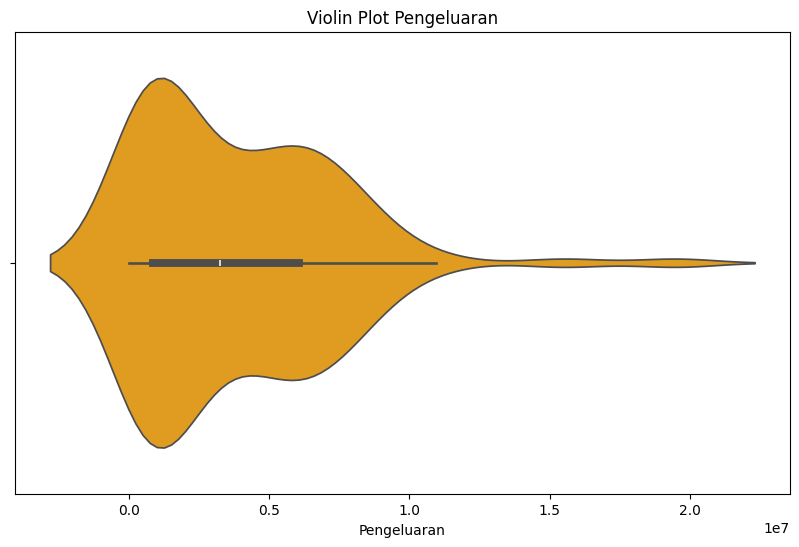

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['pengeluaran'], color='orange')

plt.title('Violin Plot Pengeluaran')
plt.xlabel('Pengeluaran')
plt.show()

**4.5 Box Plot**

<ipython-input-33-fafd2a65095f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='usia', data=df, palette='Set1')


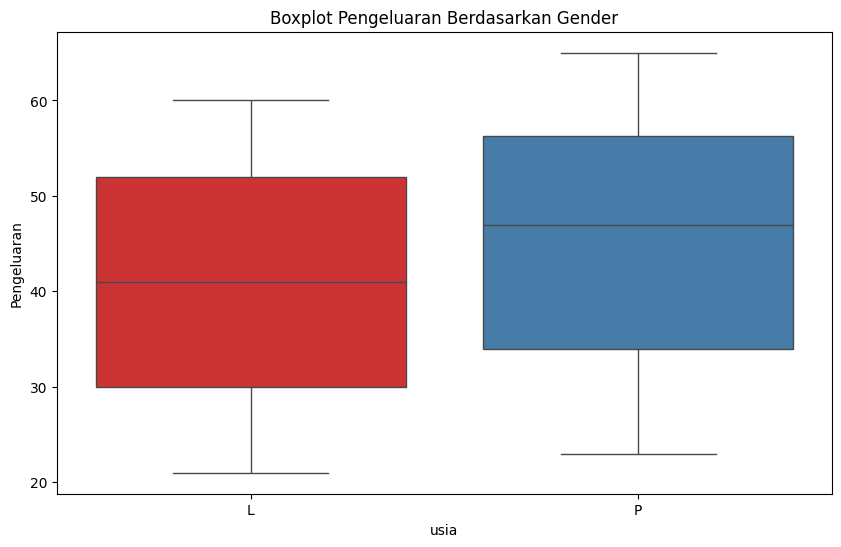

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='usia', data=df, palette='Set1')

plt.title('Boxplot Pengeluaran Berdasarkan Gender')
plt.xlabel('usia')
plt.ylabel('Pengeluaran')
plt.show()

**4.6 Contour Plot**

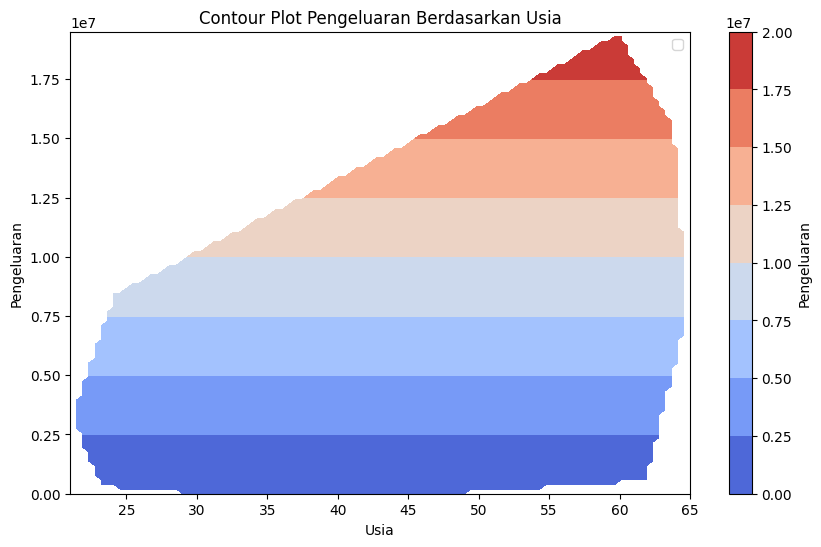

In [ ]:
from scipy.interpolate import griddata
plt.figure(figsize=(10, 6))

# Menggunakan griddata untuk interpolasi data ke grid 2D
x = df['usia']
y = df['pengeluaran']
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), y, (xi, yi), method='linear')

# Membuat contour plot dengan palet coolwarm
plt.contourf(xi, yi, zi, cmap='coolwarm')
plt.colorbar(label='Pengeluaran')

plt.title('Contour Plot Pengeluaran Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Pengeluaran')
plt.legend()
plt.show()

**4.7 Pair Plot**

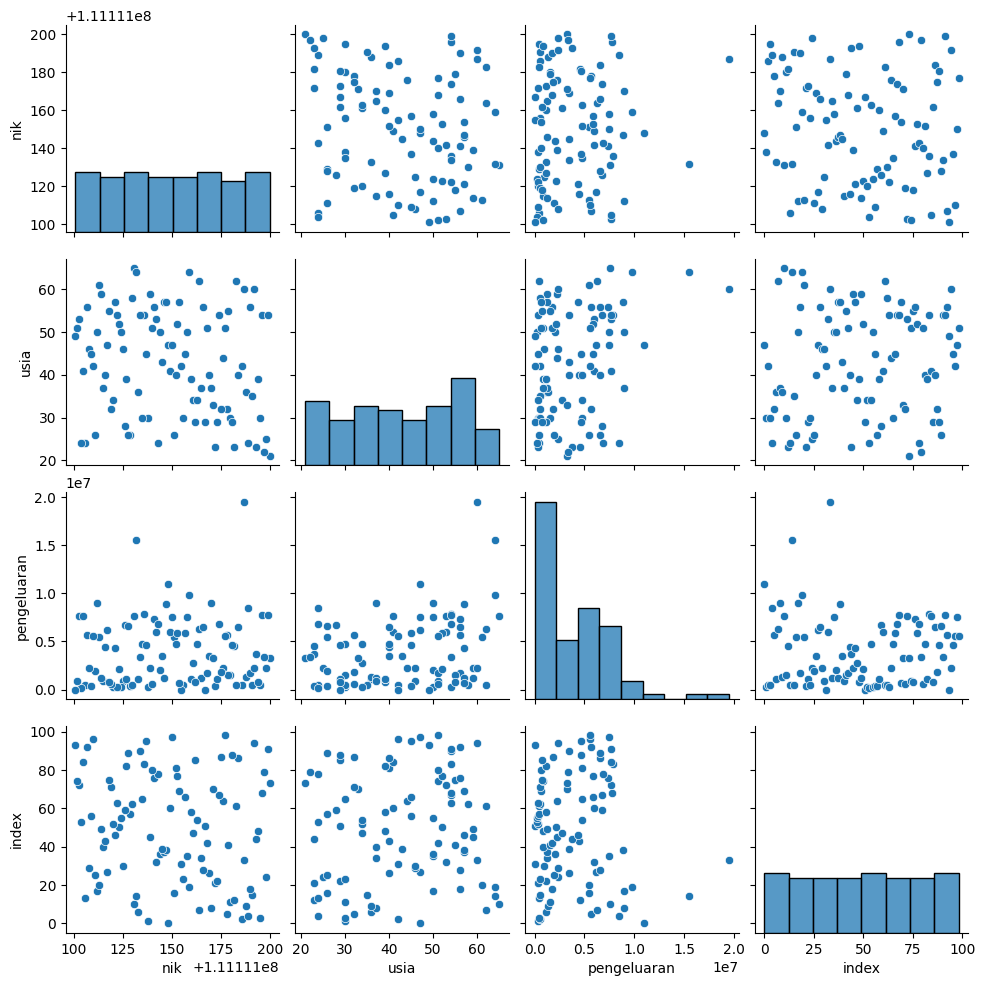

In [ ]:
sns.pairplot(df)

<Figure size 1000x600 with 0 Axes>

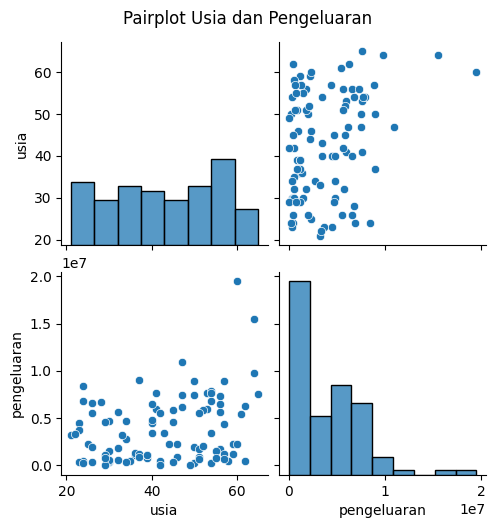

In [ ]:
plt.figure(figsize=(10, 6))

columns = ['usia', 'pengeluaran']
sns.pairplot(df[columns])

plt.suptitle('Pairplot Usia dan Pengeluaran', y=1.04)
plt.show()

# **5. Contoh Pengolahan Data Tabulasi**

In [ ]:
import pandas as pd
data = pd.DataFrame({
    'gender': [1, 2, 2, 1, 1],
    'usia': ['1', '2', '1', '3', '2'],
    'status': ['1', '2', 1, 3, '1'],
})
data

,gender,usia,status
0,1,1,1
1,2,2,2
2,2,1,1
3,1,3,3
4,1,2,1


**Keterangan:**\
**Gender**: 1 (Laki-laki), 2 (Perempuan)\
**Usia**: 1 (<15), 2 (15-65), 3 (>65)\
**Status**: 1 (Jomblo), 2 (PDKT), 3 (Menikah)

Kita ingin buat dalam bentuk tabel sesuai dengan keterangannya masing-masing

In [ ]:
# Mengubah gender
def convert_gender(gender):
    if gender == 1:
        return 'Laki-laki'
    elif gender == 2:
        return 'Perempuan'
    else:
        return gender

# Mengubah usia
def convert_usia(usia):
    if usia == '1':
        return '<15'
    elif usia == '2':
        return '15-65'
    elif usia == '3':
        return '>65'
    else:
        return usia

# Mengubah status
def convert_status(status):
    if status == '1' or status == 1:
        return 'Jomblo'
    elif status == '2':
        return 'PDKT'
    elif status == '3' or status == 3:
        return 'Menikah'
    else:
        return status

#data = data.apply(lambda x: x.astype(int))

# Menerapkan fungsi ke kolom-kolom yang sesuai
data['gender'] = data['gender'].apply(convert_gender)
data['usia'] = data['usia'].apply(convert_usia)
data['status'] = data['status'].apply(convert_status)

data

,gender,usia,status
0,Laki-laki,<15,Jomblo
1,Perempuan,15-65,PDKT
2,Perempuan,<15,Jomblo
3,Laki-laki,>65,Menikah
4,Laki-laki,15-65,Jomblo


In [ ]:
#from google.colab import sheets
#sheet = sheets.InteractiveSheet(df=data)

In [ ]:
from google.colab import files

# Menyimpan DataFrame ke file Excel (.xlsx -> excel) atau CSV (.csv -> csv)
output_path = 'DataBuatan1.xlsx'
data.to_excel(output_path, index=False)

# Mengunduh file Excel
#files.download(output_path)

# **6. Contoh Pembuatan File PDF**

In [ ]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4fee02f11bda4ad99e4073981d0845c3c7fb5070615714ca0626c18d198371e9
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
from fpdf import FPDF
from google.colab import files

# Membuat PDF dengan fpdf
pdf = FPDF()

# Menambahkan halaman
pdf.add_page()

# Menambahkan judul
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Pengalaman Saya di BPS', 0, 1, 'C')

# Menambahkan paragraf
pdf.set_font('Arial', '', 12)
pdf.ln(10)  # Jarak antara judul dan paragraf
cerita = ("Selama waktu saya bekerja di BPS, saya memiliki kesempatan untuk terlibat dalam berbagai proyek yang sangat menarik. "
          "Saya sangat menikmati tantangan ini karena memberi saya pandangan yang lebih dalam tentang berbagai aspek kehidupan masyarakat "
          "dan bagaimana data dapat digunakan untuk membuat keputusan yang lebih baik. Selain itu, bekerja dengan tim yang berdedikasi "
          "dan berpengalaman memberikan banyak pelajaran berharga tentang kerja sama dan keterampilan analisis data. Pengalaman ini "
          "sungguh memperkaya dan memperluas wawasan saya dalam bidang statistik dan penelitian sosial.")
pdf.multi_cell(0, 10, cerita)

# Menambahkan tabel
pdf.ln(10)  # Jarak antara paragraf dan tabel

# Data tabel per kolom
tanggal = ['2024-01-15', '2024-02-15', '2024-03-10']
kegiatan = ['Survei di Desa A', 'Survei di Desa B', 'Survei di Desa C']

# Menyusun data tabel
data = [['No.', 'Tanggal', 'Kegiatan']]  # Header
for i in range(len(tanggal)):
    data.append([i + 1, tanggal[i], kegiatan[i]])

# Menghitung lebar kolom berdasarkan data
col_widths = [max(pdf.get_string_width(str(cell)) for cell in col) + 10 for col in zip(*data)]  # Menambahkan padding
table_width = sum(col_widths)  # Lebar tabel
page_width = pdf.w - 2 * pdf.l_margin  # Lebar area halaman tanpa margin
x_start = (page_width - table_width) / 2  # Posisi horizontal tabel di tengah halaman

# Mencetak header tabel
pdf.set_font('Arial', 'B', 12)
pdf.set_x(x_start)
for i, header in enumerate(data[0]):
    pdf.cell(col_widths[i], 10, header, 1, 0, 'C')
pdf.ln()

# Mencetak data tabel
pdf.set_font('Arial', '', 12)
for row in data[1:]:
    pdf.set_x(x_start)
    for cell, width in zip(row, col_widths):
        pdf.cell(width, 10, str(cell), 1, 0, 'C')  # Center the cell text
    pdf.ln()

# Menyimpan PDF ke file
pdf_filename = "DataBuatan2.pdf"
pdf.output(pdf_filename)

# Mengunduh file PDF
#files.download(pdf_filename)

''